<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Sesiones/Sesion_01d_Series_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Series de Tiempo

## Propiedades:

1. **Tendencias**  
   Hay una crecimiento general o decrecimiento de los datos. Hablamos por ejemplo de tendencias positivas o negativas.

2. **Periodicidad**  
   Hay ciclos de repetición en los datos, por ejemplo periodicidad anual, mensual, diaria.

3. **Autocorrelacion**
   La autocorrelación significa una memoria de tiempos pasados

4. **Estacionariedad**
   Un solo proceso dinámico es el que da origen a la serie o por lo contrario hay no-estacionariedad que implicaria dividir la serie para proceder a hacer diferentes modelos para cada sección.

In [ ]:
#Vamos a generar series de tiempo sinteticas para reconocer estos conceptos
#Codigo tomado de:
#https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C4/W1/ungraded_labs/C4_W1_Lab_1_time_series.ipynb

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## Plot Utilities

You will be plotting several graphs in this notebook so it's good to have a utility function for that. The following code will visualize numpy arrays into a graph using Pyplot's [plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) method. The x-axis will contain the time steps. The exact unit is not critical for this exercise so you can pretend it is either seconds, hours, year, etc. The y-axis will contain the measured values at each time step.


In [1]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
 
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    if label:
      plt.legend(fontsize=14, labels=label)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()   

## Trend

The *trend* describes the general tendency of the values to go up or down as time progresses. Given a certain time period, you can see if the graph is following an upward/positive trend, downward/negative trend, or just flat. For instance, the housing prices in a good location can see a general increase in valuation as time passes. 

The simplest example to visualize is data that follows a straight line. You will use the function below to generate that. The `slope` argument will determine what the trend is. If you're coming from a mathematics background, you might recognize this as the [slope-intercept form](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form_or_Gradient-intercept_form) with the y-intercept being `0`.


In [2]:

def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

Here is a time series that trends upward. For a downward trend, simply replace the slope value below with a negative value (e.g. `-0.3`).


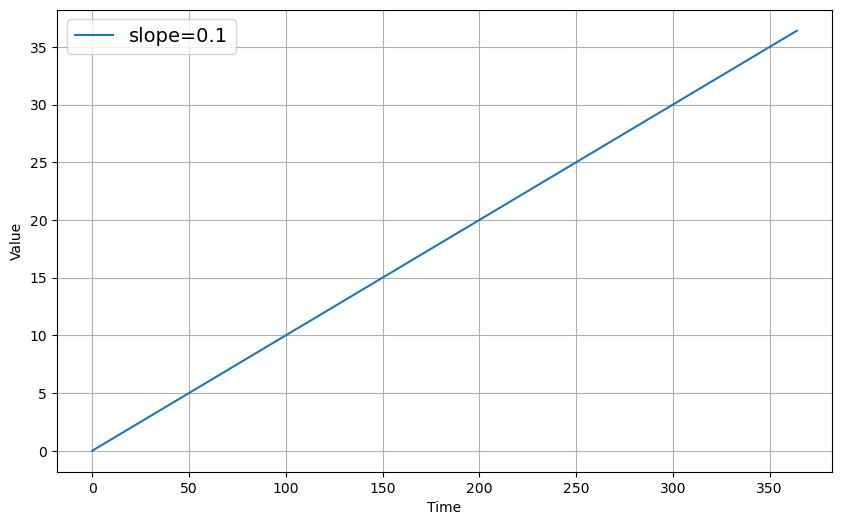

In [5]:

# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(365)

# Define the slope (You can revise this)
slope = 0.1

# Generate measurements with the defined slope
series = trend(time, slope)

# Plot the results
plot_series(time, series, label=[f'slope={slope}'])


As you can tell, you don't need machine learning to model this behavior. You can simply solve for the equation of the line and you have the perfect prediction model. Data like this is extremely rare in real world applications though and the trend line is simply used as a guide like the one shown in the [Moore's Law](https://en.wikipedia.org/wiki/Moore%27s_law) example in class.
## Seasonality

Another attribute you may want to look for is seasonality. This refers to a recurring pattern at regular time intervals. For instance, the hourly temperature might oscillate similarly for 10 consecutive days and you can use that to predict the behavior on the next day. 

You can use the functions below to generate a time series with a seasonal pattern:

In [6]:

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

The cell below shows the seasonality of the data generated because you can see the pattern every 365 time steps.


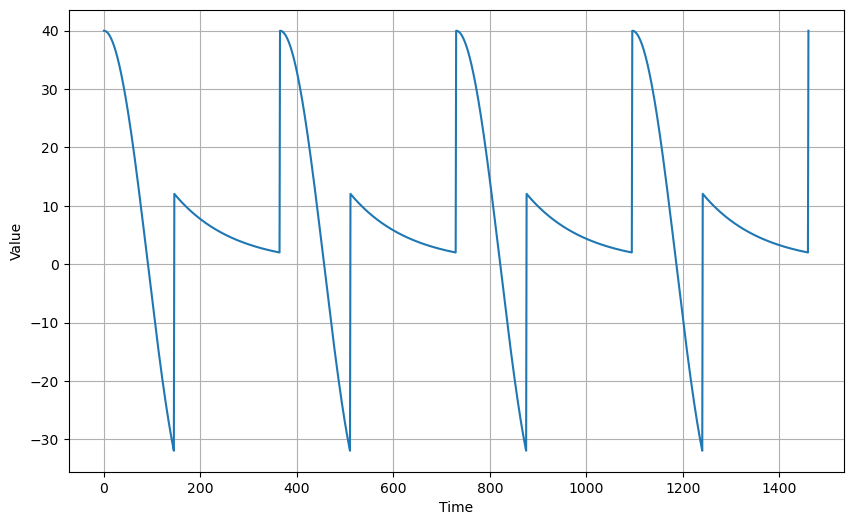

In [7]:

# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

A time series can also contain both trend and seasonality. For example, the hourly temperature might oscillate regularly in short time frames, but it might show an upward trend if you look at multi-year data.

The example below demonstrates a seasonal pattern with an upward trend:

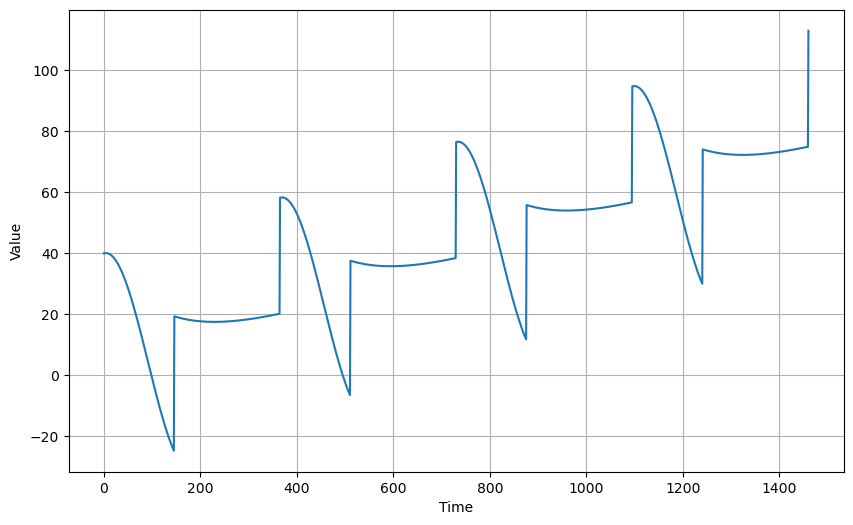

In [8]:


# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

## Noise

In practice, few real-life time series have such a smooth signal. They usually have some noise riding over that signal. The next cells will show what a noisy signal looks like:

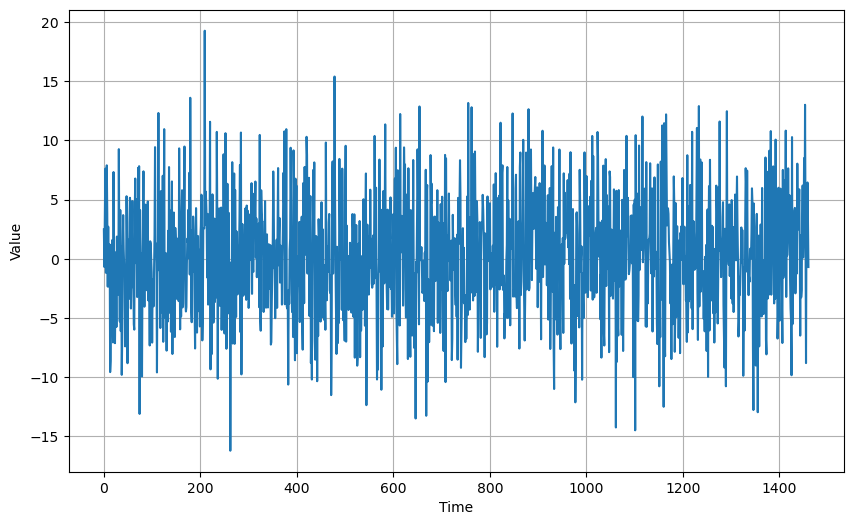

In [9]:


def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal

    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

# Define noise level
noise_level = 5

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the results
plot_series(time, noise_signal)

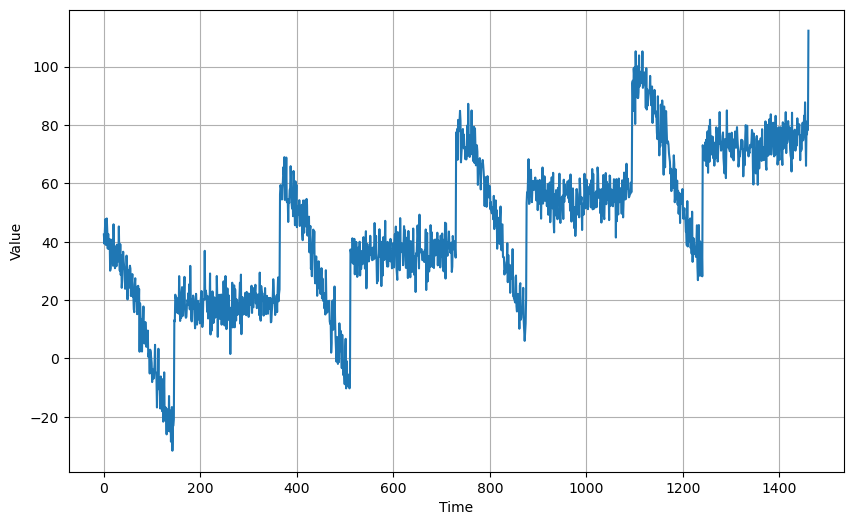

In [10]:
#Now let's add this to the time series we generated earlier:
# Add the noise to the time series
series += noise_signal

# Plot the results
plot_series(time, series)
#As you can see, the series is still trending upward and seasonal but there is more variation 
# between time steps because of the added noise.

## Autocorrelation

Time series can also be autocorrelated. This means that measurements at a given time step is a function of previous time steps. Here are some functions that demonstrate that. Notice lines that refer to the `step` variable because this is where the computation from previous time steps happen. It will also include noise (i.e. random numbers) to make the result a bit more realistic.

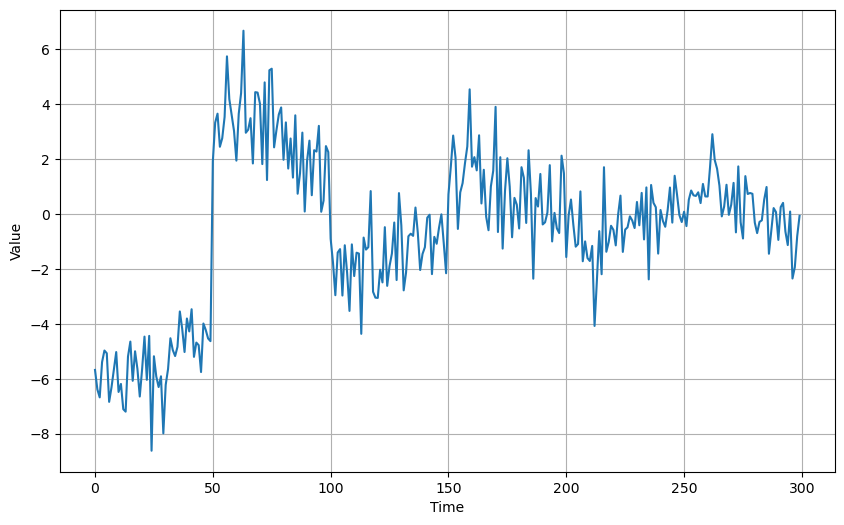

In [11]:



def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)
    
    # Initialize array of random numbers equal to the length 
    # of the given time steps plus 50
    ar = rnd.randn(len(time) + 50)
    

    # Set first 50 elements to a constant
    #ar[:50] = 100
    ar[:50] = 10
    
    # Define scaling factors
    phi1 = 0.5
    phi2 = 0.1

    # Autocorrelate element 51 onwards with the measurement at 
    # (t-50) and (t-30), where t is the current time step
    for step in range(50, len(time) + 50):
        ar[step] -= phi1 * ar[step - 50]
        ar[step] -= phi2 * ar[step - 33]
    
    # Get the autocorrelated data and scale with the given amplitude.
    # The first 50 elements of the original array is truncated because
    # those are just constant and not autocorrelated.
    ar = ar[50:] * amplitude

    return ar
# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(500)
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=1, seed=42)

# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:300], series[:300])

In [ ]:
#Prediccion estadistica de los datos sinteticos anteriores
#https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C4/W1/ungraded_labs/C4_W1_Lab_2_forecasting.ipynb


In [ ]:
#Generacion de dashboard con librerias

# Aplicacion Series de tiempo

In [ ]:
#Tipo de dato de tiempo en Pandas
#En este ejemplo vamos a crear una serie de tiempo de un mes cada dia cada hora
import pandas as pd
from datetime import datetime
import numpy as np

# range_date
rd = pd.date_range(start ='1/1/2025', end ='2/1/2025', freq ='h')
print(rd)
print(type(rd[2]))
print(len(rd))

In [ ]:
#Creamos un dataframe con una columna aleatoria y el tiempo como indice
df = pd.DataFrame(rd, columns=['datetime'])
df['data'] = np.random.randint(0, 100, size=(len(rd)))
df.set_index('datetime', inplace=True)
df.head()
df.tail()

In [ ]:
#Podemos usar el indice como una columna de la misma manera que usamos los otros tipos
filtered_df = df.loc['2025-01-31']  
print(filtered_df)  



El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

